# Introduction to Pandas for Finance
## Numerical processing of financial data

Double Degree Data and Finance 

Enseignant: Anne-Claire Maurice

### TP #1 : preparing the data

#### Objective
The goal of this hands-on session is to read and clean a dataset containing trade prices on cryptocurrency pairs using DataFrames and the module Pandas. 

#### Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## 1. Read the data set
Using the proper reading method, read the data set given in the file TP1_trades_data.csv

NB: you may need to set the parameter *low_memory* to *False* to avoid getting a warning.

In [2]:
df = pd.read_csv("TP1_trades_data.csv", low_memory=False)
df

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,787987369.0,1348.350,0.031800,0.0,bnce,eth-usdt
1,2022-10-24 14:30:00.529999872,1730655560.0,19227.330,0.050780,0.0,bnce,btc-usdt
2,2022-10-24 14:30:00.540000000,1730655561.0,19227.320,0.027150,1.0,bnce,btc-usdt
3,2022-10-24 14:30:00.545999872,788017659.0,1329.310,0.351400,1.0,bnce,eth-usdt
4,2022-10-24 14:30:00.545999872,788017660.0,1329.300,0.030000,1.0,bnce,eth-usdt
...,...,...,...,...,...,...,...
848335,2022-10-24 14:12:27.580999936,251571586.0,19313.000,0.001210,0.0,stmp,btc-usd
848336,2022-10-24 14:35:45.876000000,251574460.0,5.883,8.510000,1.0,stmp,dot-usd
848337,2022-10-24 14:17:37.334000128,251572100.0,19263.000,0.000002,1.0,stmp,btc-usd
848338,2022-10-24 14:17:37.768000000,251572136.0,1331.900,0.033904,1.0,stmp,eth-usd


## 2. Inspect the data

Take the time needed to take a first look at the data. Display the first rows, look at the columns etc.

In [3]:
df.head(10)

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,787987369.0,1348.350,0.03180,0.0,bnce,eth-usdt
1,2022-10-24 14:30:00.529999872,1730655560.0,19227.330,0.05078,0.0,bnce,btc-usdt
2,2022-10-24 14:30:00.540000000,1730655561.0,19227.320,0.02715,1.0,bnce,btc-usdt
3,2022-10-24 14:30:00.545999872,788017659.0,1329.310,0.35140,1.0,bnce,eth-usdt
4,2022-10-24 14:30:00.545999872,788017660.0,1329.300,0.03000,1.0,bnce,eth-usdt
5,2022-10-24 14:30:00.545999872,788017662.0,1329.250,0.51860,1.0,bnce,eth-usdt
6,2022-10-24 14:30:00.545999872,788017661.0,1329.290,0.30000,1.0,bnce,eth-usdt
7,2022-10-24 14:30:00.547000064,1730655562.0,19227.340,0.00082,0.0,bnce,btc-usdt
8,2022-10-24 14:30:00.526000128,788017658.0,1329.330,0.50000,1.0,bnce,eth-usdt
9,2022-10-24 14:30:00.550000128,182661263.0,6.827,1.62000,1.0,bnce,link-usdt


Start inspecting the data by answering to the following questions:
- How many rows and columns there are in my data set?

**848340 rows and 7 columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848340 entries, 0 to 848339
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        848340 non-null  object 
 1   trade_id         848340 non-null  object 
 2   price            848336 non-null  float64
 3   amount           848340 non-null  float64
 4   taker_side_sell  848340 non-null  float64
 5   exchange         848340 non-null  object 
 6   pair             848340 non-null  object 
dtypes: float64(3), object(4)
memory usage: 45.3+ MB


- What does each column represent? What is its type supposed to be? Does it match the type in the dataset?

    - *timestamp*: trade's time. Expected types: date, datetime or datetime64[ns] 
    - *trade_id*: trade's identifier. Expected types: int or string (object)
    - *price*: trade's price. Expected types: float, float64
    - *amount*: number of base asset traded during the transaction. Expected types: float, float64
    - *taker_side_sell*: indicator to know if the trade has been initiated by the buyer or the seller.Expected types: int, float, bool or category.
    - *exchange*: exchange code on which the trade has been made. Expected type: string (object).
    - *pair*: trade's underlying. Expected type: string (object).
    
Modify the dataframe so that all columns have the appropriate type.

Useful methods: *astype*, *to_datetime*, etc. 

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.taker_side_sell = df.taker_side_sell.astype("bool")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848340 entries, 0 to 848339
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   timestamp        848340 non-null  datetime64[ns]
 1   trade_id         848340 non-null  object        
 2   price            848336 non-null  float64       
 3   amount           848340 non-null  float64       
 4   taker_side_sell  848340 non-null  bool          
 5   exchange         848340 non-null  object        
 6   pair             848340 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 39.6+ MB


Update the dataframe so that the data is sorted over time.

In [8]:
df.sort_values("timestamp", inplace = True)

Verify that the *trade_id* is unique per each trade. If not, verify that duplicate trade identifiers correspond to identical trades. Correct the dataset so that each trade is unique.

In [9]:
trade_id_count = df.trade_id.value_counts()
trade_id_count

1.529516061456515e+26    5
1730418308.0             3
1730499353.0             2
1730418853.0             2
1730426888.0             2
                        ..
284694032.0              1
372458704.0              1
372458703.0              1
1730543917.0             1
1730830875.0             1
Name: trade_id, Length: 848326, dtype: int64

In [10]:
duplicate_trade_id = trade_id_count[trade_id_count > 1].index
duplicate_trade_id

Index(['1.529516061456515e+26', '1730418308.0', '1730499353.0', '1730418853.0',
       '1730426888.0', '1730732945.0', '5207867360.0', '1730448541.0',
       '1730418562.0', '788032203.0'],
      dtype='object')

In [11]:
df[df.trade_id.isin(duplicate_trade_id)]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
438055,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt
225033,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt
225041,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt
437743,2022-10-24 14:00:01.768000000,1730418562.0,19351.72,0.11560,True,bnce,btc-usdt
225026,2022-10-24 14:00:01.768000000,1730418562.0,19351.72,0.11560,True,bnce,btc-usdt
225027,2022-10-24 14:00:04.408000000,1730418853.0,19351.77,0.01401,False,bnce,btc-usdt
438615,2022-10-24 14:00:04.408000000,1730418853.0,19351.77,0.01401,False,bnce,btc-usdt
225028,2022-10-24 14:01:00.056999936,1730426888.0,19329.59,0.07125,True,bnce,btc-usdt
446465,2022-10-24 14:01:00.056999936,1730426888.0,19329.59,0.07125,True,bnce,btc-usdt
694482,2022-10-24 14:01:50.648000000,5207867360.0,6.15,20.00000,True,ftxx,uni-usdt


In [12]:
# We confirm that each duplicate trade_id corresponds to a unique trade. 

In [13]:
df.drop_duplicates(subset=['trade_id'], inplace = True)

In [14]:
# We verify that it worked.

In [15]:
df[df.trade_id.isin(duplicate_trade_id)]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
438055,2022-10-24 14:00:00.000999936,1730418308.0,19352.40,0.00339,True,bnce,btc-usdt
437743,2022-10-24 14:00:01.768000000,1730418562.0,19351.72,0.11560,True,bnce,btc-usdt
225027,2022-10-24 14:00:04.408000000,1730418853.0,19351.77,0.01401,False,bnce,btc-usdt
225028,2022-10-24 14:01:00.056999936,1730426888.0,19329.59,0.07125,True,bnce,btc-usdt
694482,2022-10-24 14:01:50.648000000,5207867360.0,6.15,20.00000,True,ftxx,uni-usdt
476242,2022-10-24 14:04:00.100999936,1730448541.0,19310.40,0.00676,True,bnce,btc-usdt
355915,2022-10-24 14:12:22.348000000,1730499353.0,19318.96,0.08012,True,bnce,btc-usdt
767803,2022-10-24 14:17:34.368999936,1.529516061456515e+26,1334.51,0.07290,True,huob,eth-usdt
326203,2022-10-24 14:40:49.865999872,1730732945.0,19249.09,0.01071,False,bnce,btc-usdt
225031,2022-10-24 14:53:35.899000064,788032203.0,1333.14,0.05000,True,bnce,eth-usdt


In [16]:
df.trade_id.value_counts()

787987369.0     1
1730686932.0    1
1730686927.0    1
1730686923.0    1
1730686925.0    1
               ..
284694029.0     1
284694031.0     1
284694030.0     1
61257904.0      1
1730830875.0    1
Name: trade_id, Length: 848326, dtype: int64

Search if there are any missing prices in the dataset and get rid of the corresponding rows if necessary.

In [17]:
df[df.price.isna()]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
225035,2022-10-24 14:00:17.427000064,787987649.1,NaN,0.76500,True,bnce,eth-usdt
225036,2022-10-24 14:00:21.936000000,1730421453.1,NaN,0.24968,False,bnce,btc-usdt
225037,2022-10-24 14:35:28.483000064,1730696163.1,NaN,0.00748,True,bnce,btc-usdt
225038,2022-10-24 14:43:32.825999872,1730746498.1,NaN,0.00063,False,bnce,btc-usdt


In [18]:
df.dropna(subset=['price'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848322 entries, 0 to 225042
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   timestamp        848322 non-null  datetime64[ns]
 1   trade_id         848322 non-null  object        
 2   price            848322 non-null  float64       
 3   amount           848322 non-null  float64       
 4   taker_side_sell  848322 non-null  bool          
 5   exchange         848322 non-null  object        
 6   pair             848322 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 46.1+ MB


Update the dataset if necessary to ensure that every trade admits a strictly positive price and amount. Get rid of the non-consistent rows if necessary.

In [20]:
df[df.price < 0]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair


In [21]:
df[df.amount.isna()]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair


In [22]:
df[df.amount < 0]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
225039,2022-10-24 14:00:06.748000000,1730419248.1,19351.560,-0.012410,True,bnce,btc-usdt
337560,2022-10-24 14:00:19.812000000,182659344.1,6.912,-68.240000,True,bnce,link-usdt
225040,2022-10-24 14:04:00.096999936,1730448539.1,19310.760,-0.058730,True,bnce,btc-usdt
641386,2022-10-24 14:32:50.184000000,437881424.1,19216.190,-0.009553,False,cbse,btc-usd
726461,2022-10-24 14:53:14.820000000,5208373822.1,52.415,-0.010000,False,ftxx,ltc-usd


In [23]:
df.drop(df[df.amount < 0].index, inplace = True)

In [24]:
df[df.amount < 0]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair


At this stage, you should be confident that:
- each column has consistent values and is in a proper type
- you don't have any duplicates or missing data
- you don't have financially inconsistent data

## 3. Explore the data

### First explorations

Answer to the following questions:
- How many distinct pairs are there in the dataset?
- How many distinct exchanges are there? Give the list of the exchanges' codes
- What pair admits the highest number of trades? What pairs admit the least number of trades?
- Are there more trades initiated by buyers or by sellers?
- What are the five trades with the largest amounts?
- What are the 10 smallest distinct traded prices?

Useful methods: *unique*, *nunique*, *value_counts*, *nsmallest*, etc.

In [25]:
df.pair.nunique()

101

In [26]:
# There are 101 distinct pairs.

In [27]:
df.exchange.nunique()

9

In [28]:
df.exchange.unique()

array(['bnce', 'huob', 'ftxx', 'cbse', 'stmp', 'itbi', 'gmni', 'cexi',
       'btrx'], dtype=object)

In [29]:
# There are 9 exchanges: bnce, huob, ftxx, cbse, stmp, itbi, gmni, cexi, and btrx

In [30]:
df.pair.value_counts()

btc-usdt     422630
eth-usdt      61248
btc-usd       58365
eth-usd       57908
sol-usd       16746
              ...  
luna-usd         44
bnb-dai           2
iota-usd          1
vet-usd           1
usdc-usdc         1
Name: pair, Length: 101, dtype: int64

In [31]:
df.taker_side_sell.value_counts()

True     430203
False    418114
Name: taker_side_sell, dtype: int64

In [32]:
# There are more trades initiated by sellers.

In [33]:
df.nlargest(5, columns="amount")

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
490456,2022-10-24 14:20:26.063000064,214202241.0,0.00001,6.019928e+09,True,bnce,shib-usdt
47302,2022-10-24 14:34:35.319000064,214203046.0,0.00001,3.535163e+09,True,bnce,shib-usdt
18064,2022-10-24 14:30:23.633999872,214202931.0,0.00001,3.231175e+09,False,bnce,shib-usdt
490457,2022-10-24 14:20:26.063000064,214202240.0,0.00001,3.071204e+09,True,bnce,shib-usdt
186996,2022-10-24 14:51:49.230000128,214203609.0,0.00001,1.882075e+09,False,bnce,shib-usdt


In [34]:
# The 10 smallest distinct traded prices are the following:
np.sort(df.price.unique())[:10]

array([9.840e-06, 9.850e-06, 9.858e-06, 9.860e-06, 9.863e-06, 9.870e-06,
       9.873e-06, 9.875e-06, 9.880e-06, 9.881e-06])

### Focus on the pair BTC-USDT

Create another dataset containing only the trades on the pair BTC-USDT.

In [35]:
df_filtered = df[df.pair == "btc-usdt"].copy()

- Do a statistical analysis of the prices. 
- Plot the distribution of the prices.
- Plot the box plot of the prices, what do you observe?
- Extract the prices that deviate significantly from the average (i.e. at least 3 times from the standard deviation). 

Useful methods: *describe*, any standard statistical methods (min, max, mean etc.), any plotting methods (plot, hist). 

In [36]:
df_filtered.price.describe()

count    4.226300e+05
mean     1.936685e+04
std      5.375274e+04
min      1.915700e+04
25%      1.922070e+04
50%      1.924500e+04
75%      1.928410e+04
max      2.922541e+07
Name: price, dtype: float64

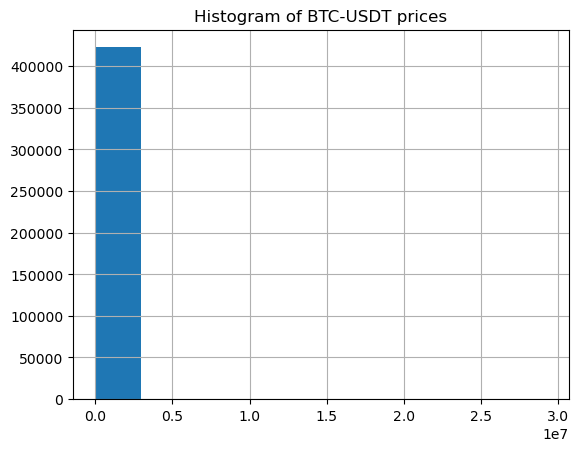

In [37]:
df_filtered.price.hist()
plt.title("Histogram of BTC-USDT prices")
plt.show()

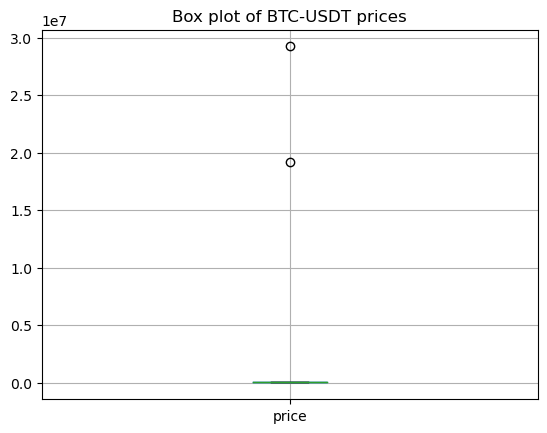

In [38]:
df_filtered.boxplot(column = "price")
plt.title("Box plot of BTC-USDT prices")
plt.show()

In [39]:
price_mean = df_filtered.price.mean()
price_stddev = df_filtered.price.std()
df_filtered[np.abs(df_filtered.price - price_mean) > 3 * price_stddev]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
225025,2022-10-24 14:23:38.793999872,1730593992.1,19206000.0,0.00122,False,bnce,btc-usdt
225032,2022-10-24 14:30:02.856999936,1730655988.1,29225410.0,0.00600,False,bnce,btc-usdt


In [40]:
# More advanced solution:
from scipy import stats
df_filtered[np.abs(stats.zscore(df_filtered.price)) > 3]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
225025,2022-10-24 14:23:38.793999872,1730593992.1,19206000.0,0.00122,False,bnce,btc-usdt
225032,2022-10-24 14:30:02.856999936,1730655988.1,29225410.0,0.00600,False,bnce,btc-usdt


What do you notice? Make any reasonable decisions to correct your data set. Resume your price study if necessary.

Warning: Also propagate the changes made on the filtered dataset to the global one.

NB: There are no significant outliers for the other pairs. There is no need to perform a similar analysis on them. 

In [41]:
mask = df_filtered[np.abs(df_filtered.price - price_mean) > 3 * price_stddev].index
df_filtered.drop(index = mask, inplace = True)

In [42]:
df_filtered[np.abs(stats.zscore(df_filtered.price)) > 3]

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair


In [43]:
df.loc[mask] # we check that the mask lead to the same trades in the global dataset

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
225025,2022-10-24 14:23:38.793999872,1730593992.1,19206000.0,0.00122,False,bnce,btc-usdt
225032,2022-10-24 14:30:02.856999936,1730655988.1,29225410.0,0.00600,False,bnce,btc-usdt


In [44]:
df.drop(index = mask, inplace = True)

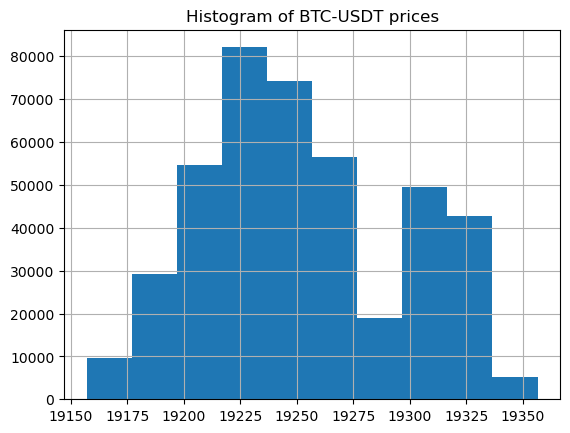

In [45]:
df_filtered.price.hist()
plt.title("Histogram of BTC-USDT prices")
plt.show()

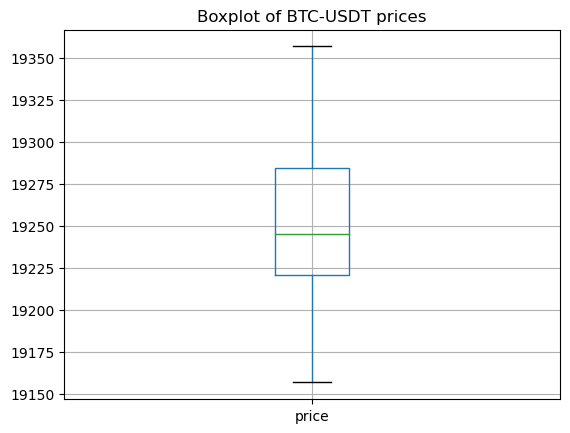

In [46]:
df_filtered.boxplot(column = "price")
plt.title("Boxplot of BTC-USDT prices")
plt.show()

Perform the same analysis for the amounts. What can you conclude? 

In [47]:
df_filtered.amount.describe()

count    4.226280e+05
mean     6.101562e-02
std      3.207365e-01
min      1.000000e-08
25%      3.830000e-03
50%      1.259000e-02
75%      5.000000e-02
max      1.257620e+02
Name: amount, dtype: float64

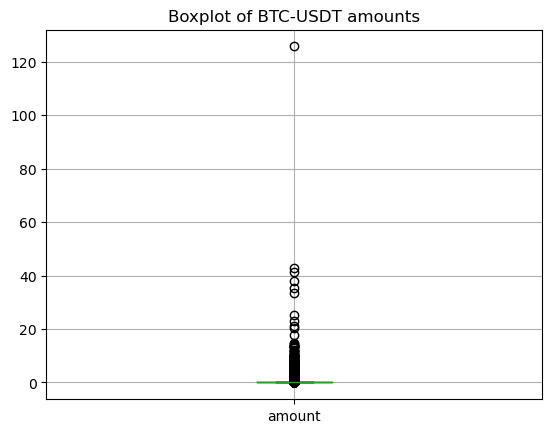

In [48]:
df_filtered.boxplot(column = "amount")
plt.title("Boxplot of BTC-USDT amounts")
plt.show()

Display the evolution of the BTC-USDT price over time.

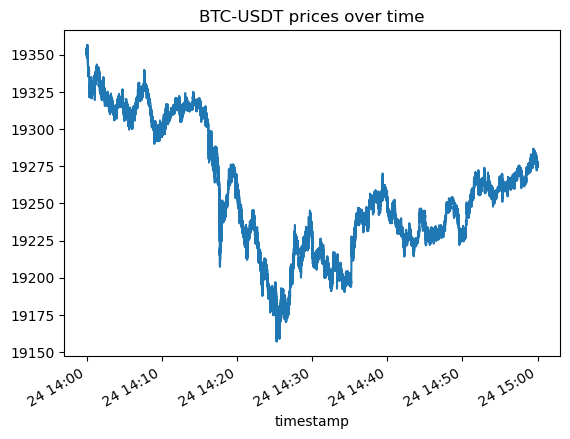

In [49]:
df_filtered.set_index("timestamp").price.plot()
plt.title("BTC-USDT prices over time")
plt.show()

Display in a scatter plot the amounts as a function of the exchange code. What can you conclude?

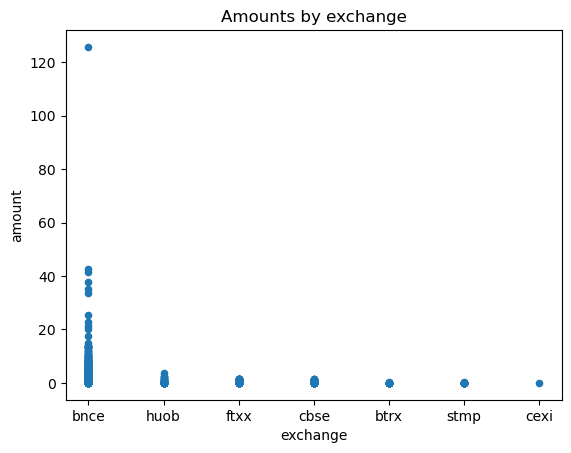

In [50]:
df_filtered.plot.scatter(x = 'exchange', y = "amount")
plt.title("Amounts by exchange")
plt.show()

In [51]:
# We can conclude that bnce is by far the exchange on which the trade amounts are the largest. 

## End of the session
Save your global dataset in a new CSV file. 

In [52]:
df.to_csv("TP1_trades_data_clean.csv", index=False)